# **Team cl_AI_mate**
---
#### Team members
* **Harsh Soni**
* **Shivansh Rastogi**
* **Gaurav Garwa**
* **Prakhar Raj Pandey**  

---
 [Website](https://harshhrs24-team-cl-ai-mate-app-md7w7w.streamlit.app/
)

[Proof of concept](https://www.craft.do/s/1eTduABsPuFIDX
)

---
 





# Explanatory Data Analysis 
## Heatwave Forecasting

### Modules and packages requirement



In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px 

# from download import download
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (24, 8)
mpl.rcParams['axes.grid'] = False



 
> ### Loading the data
### Data Source - OpenWether API
- Multivariate Timeseries of weather parameter 
- Location - Adilabad (Considered for the scope of thi EDA) 
- Resolutuion - hourly


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ad_2.csv' )

> ### Data Preprocessing



In [ ]:
df.head() # structure 

Unnamed: 0      name             datetime  temp  feelslike   dew  humidity  \
0           0  Adilabad  2012-01-01T00:00:00  22.7       22.7  20.1     85.27   
1           1  Adilabad  2012-01-01T01:00:00  22.3       22.3  20.4     89.01   
2           2  Adilabad  2012-01-01T02:00:00  21.7       21.7  20.6     93.47   
3           3  Adilabad  2012-01-01T03:00:00  21.5       21.5  20.7     95.21   
4           4  Adilabad  2012-01-01T04:00:00  21.5       21.5  20.7     95.21   

   precip  precipprob preciptype  ...  visibility  solarradiation  \
0     0.0           0        NaN  ...         NaN             0.0   
1     0.0           0        NaN  ...         NaN             0.0   
2     0.0           0        NaN  ...         NaN             0.0   
3     0.0           0        NaN  ...         NaN             0.0   
4     0.0           0        NaN  ...         NaN             0.0   

   solarenergy  uvindex  severerisk        conditions                 icon  \
0          NaN      0.0         NaN  Partially cloudy  partly-cloudy-night   
1          NaN      0.0         NaN  Partially cloudy  partly-cloudy-night   
2          NaN      0.0         NaN  Partially cloudy  partly-cloudy-night   
3          NaN      0.0         NaN  Partially cloudy  partly-cloudy-night   
4          NaN      0.0         NaN  Partially cloudy  partly-cloudy-night   

   stations    far  heat_index  
0    remote  72.86   71.792706  
1    remote  72.14   69.769724  
2    remote  71.06   66.656375  
3    remote  70.70   65.394085  
4    remote  70.70   65.394085  

[5 rows x 27 columns]

> ### Data Size 
- 97176 Rows 
- 27 Columns

In [ ]:
#size
df.shape

(97176, 27)

### Checking for Null values and data types
- Null values are encountered in preciptype,snow,snowdepth,windgust,sealevelpressure,visibility,severerisk,solarenergy features and hence not used in prediction.
- 9 Numerical Data columns 
- 1 Object column containing timestamp of the data

- Obejct datatype is required to be converted to Datetime data type for set it as the index of the time series data 


In [ ]:
#meta date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97176 entries, 0 to 97175
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        97176 non-null  int64  
 1   name              97176 non-null  object 
 2   datetime          97176 non-null  object 
 3   temp              97176 non-null  float64
 4   feelslike         97176 non-null  float64
 5   dew               97176 non-null  float64
 6   humidity          97176 non-null  float64
 7   precip            97169 non-null  float64
 8   precipprob        97176 non-null  int64  
 9   preciptype        20134 non-null  object 
 10  snow              9257 non-null   float64
 11  snowdepth         9270 non-null   float64
 12  windgust          9270 non-null   float64
 13  windspeed         97176 non-null  float64
 14  winddir           97176 non-null  float64
 15  sealevelpressure  11419 non-null  float64
 16  cloudcover        97176 non-null  float6

## Generating descriptive statistics of the Features
- count: number of non-missing values in each column
- mean: mean (average) of each column
- std: standard deviation of each column
- min: minimum value of each column
- 25%: 25th percentile (lower quartile) of each column
- 50%: 50th percentile (median) of each column
- 75%: 75th percentile (upper quartile) of each column
- max: maximum value of each column



In [ ]:
#Generate descriptive statistics.
# get sense of the data 

df.describe()

Unnamed: 0          temp     feelslike           dew      humidity  \
count  97176.000000  97176.000000  97176.000000  97176.000000  97176.000000   
mean   48587.500000     27.170615     27.479283     15.235299     56.264844   
std    28052.439217      6.487733      6.622533      7.565800     27.645034   
min        0.000000      7.800000      5.900000    -14.400000      3.660000   
25%    24293.750000     23.300000     23.300000      9.900000     30.410000   
50%    48587.500000     26.700000     26.600000     16.200000     57.230000   
75%    72881.250000     30.900000     32.300000     22.300000     82.480000   
max    97175.000000     47.500000     53.600000     28.600000    100.000000   

             precip    precipprob    snow  snowdepth     windgust  ...  \
count  97169.000000  97176.000000  9257.0     9270.0  9270.000000  ...   
mean       0.107761     20.570923     0.0        0.0    14.501435  ...   
std        0.420475     40.422101     0.0        0.0    11.874320  ...   
min        0.000000      0.000000     0.0        0.0     0.400000  ...   
25%        0.000000      0.000000     0.0        0.0     5.800000  ...   
50%        0.000000      0.000000     0.0        0.0    10.100000  ...   
75%        0.000000      0.000000     0.0        0.0    20.200000  ...   
max       24.600000    100.000000     0.0        0.0    70.200000  ...   

            winddir  sealevelpressure    cloudcover    visibility  \
count  97176.000000      11419.000000  97176.000000  11418.000000   
mean     175.090623       1008.079937     52.045447     19.492161   
std      105.601163          5.535880     36.724716      7.176977   
min        0.000000        990.900000      0.000000      1.300000   
25%       71.000000       1004.000000     11.600000     10.000000   
50%      172.700000       1008.000000     59.500000     24.100000   
75%      271.700000       1013.000000     88.200000     24.100000   
max      360.000000       1023.000000    100.000000     50.000000   

       solarradiation   solarenergy       uvindex   severerisk           far  \
count    97150.000000  52709.000000  97150.000000  9270.000000  97176.000000   
mean       230.411820      1.528280      2.292043    12.151241     80.907107   
std        309.677275      1.106215      3.108307     8.558506     11.677920   
min          0.000000      0.000000      0.000000     3.000000     46.040000   
25%          0.000000      0.500000      0.000000    10.000000     73.940000   
50%         10.200000      1.500000      0.000000    10.000000     80.060000   
75%        456.000000      2.500000      5.000000    10.000000     87.620000   
max       1074.500000      3.900000     10.000000    75.000000    117.500000   

         heat_index  
count  97176.000000  
mean      83.398561  
std       10.222194  
min       55.632344  
25%       76.600653  
50%       82.079335  
75%       90.374390  
max      128.755284  

[8 rows x 21 columns]

### Data is a multivariate timeseries of weather parameter 
- Location - Adilabad 
- Resolutuion - hourly 



In [ ]:
ts

temp
datetime        
2012-01-01  32.1
2012-01-02  33.5
2012-01-03  33.4
2012-01-04  33.7
2012-01-05  34.7
...          ...
2023-01-27  31.3
2023-01-28  32.0
2023-01-29  32.6
2023-01-30  32.0
2023-01-31  32.0

[4049 rows x 1 columns]

In [ ]:
ts.shape

(4049, 1)

## Feature Correlation 
- Pearson correlation is a statistical measure of the linear correlation between two continuous variables. It measures the degree of association between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation between the variables.

- Pearson correlation is often used to measure the strength and direction of the relationship between two features in a dataset. This helps to identify which features are highly correlated and which ones are not



In [ ]:
hw_corr = df[['temp','humidity','heat_index', 'uvindex','windspeed','precip']].corr(method='pearson')
hw_corr

temp  humidity  heat_index   uvindex  windspeed    precip
temp        1.000000 -0.579766    0.841288  0.573959   0.148446 -0.021366
humidity   -0.579766  1.000000   -0.564028 -0.416567   0.045165  0.238763
heat_index  0.841288 -0.564028    1.000000  0.563616   0.147434 -0.019412
uvindex     0.573959 -0.416567    0.563616  1.000000   0.200744 -0.032554
windspeed   0.148446  0.045165    0.147434  0.200744   1.000000  0.167302
precip     -0.021366  0.238763   -0.019412 -0.032554   0.167302  1.000000

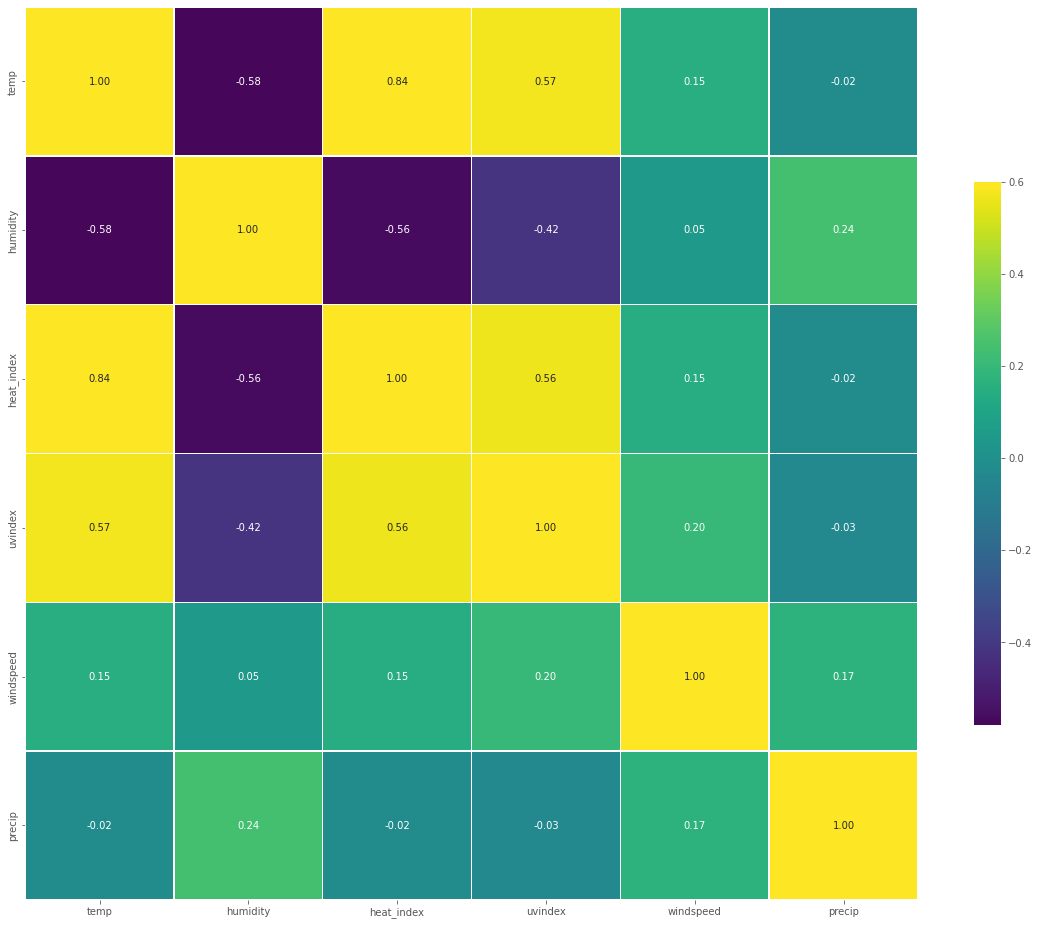

In [ ]:
g = sns.heatmap(hw_corr,  vmax=.6, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='viridis')
g.figure.set_size_inches(20,20)
    
plt.show()

## Feature pairplot
- relationship between all pairs of features in a dataset
- The diagonal of the grid usually shows a histogram or a kernel density estimate (KDE) of each feature

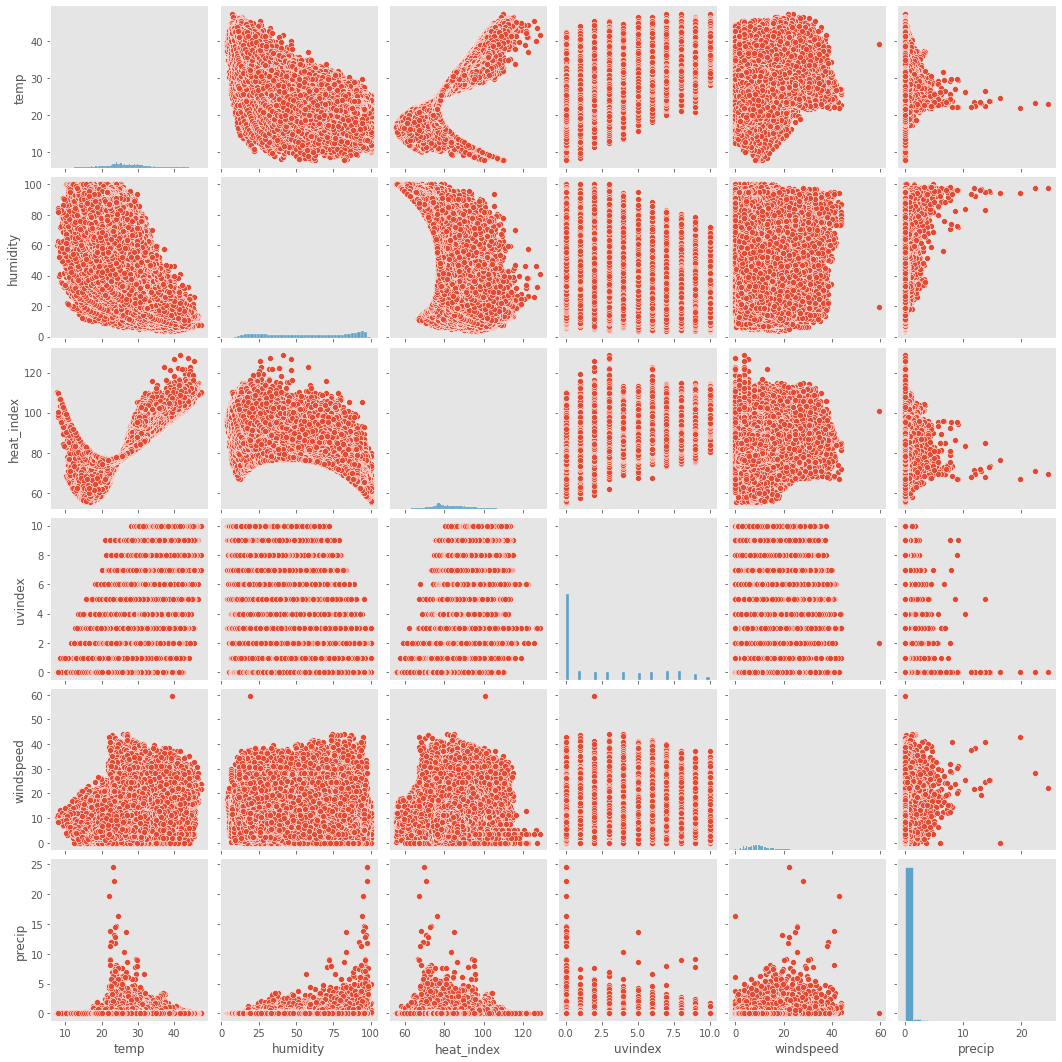

In [ ]:
sns.pairplot(df[['temp','humidity','heat_index', 'uvindex','windspeed','precip']])

### Data Resampling
- Changing the frequency of the time series data. It involves aggregating or downsampling the data from a higher frequency to a lower frequency or upsampling the data from a lower frequency to a higher frequency.



In [ ]:
col = 'temp'
ts = df.loc[: , ['datetime' ,col ]]
ts['datetime'] =  pd.to_datetime(ts['datetime'])
ts = ts.set_index('datetime')
ts = ts.resample('D').max()
ts = ts.reindex()

### Decomposing the features 
- Seasonal decomposition using moving averages and returns a object with seasonal, trend, and resid attributes.



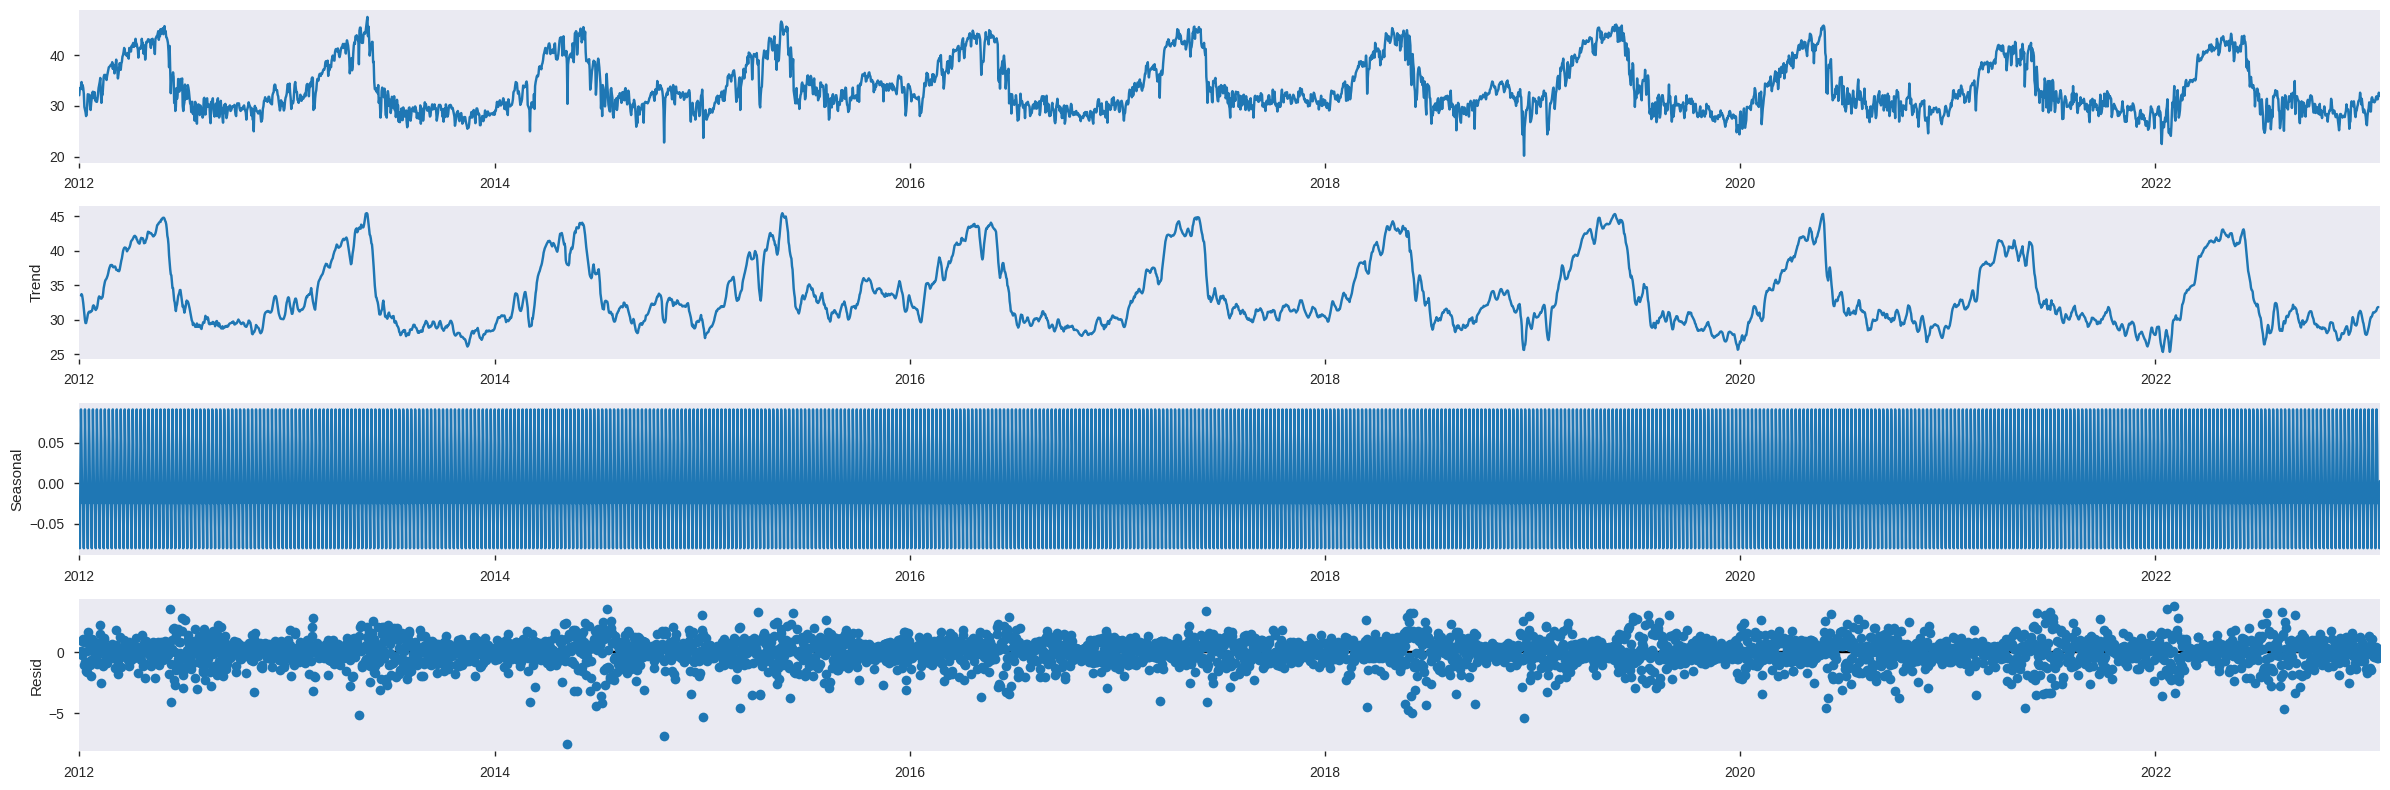

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = ts
result = seasonal_decompose(series, model='additive')
ax = result.plot()
ax
# temperature

In [ ]:
col = 'humidity'
ts = df.loc[: , ['datetime' ,col ]]
ts['datetime'] =  pd.to_datetime(ts['datetime'])
ts = ts.set_index('datetime')
ts = ts.resample('D').max()
ts = ts.reindex()

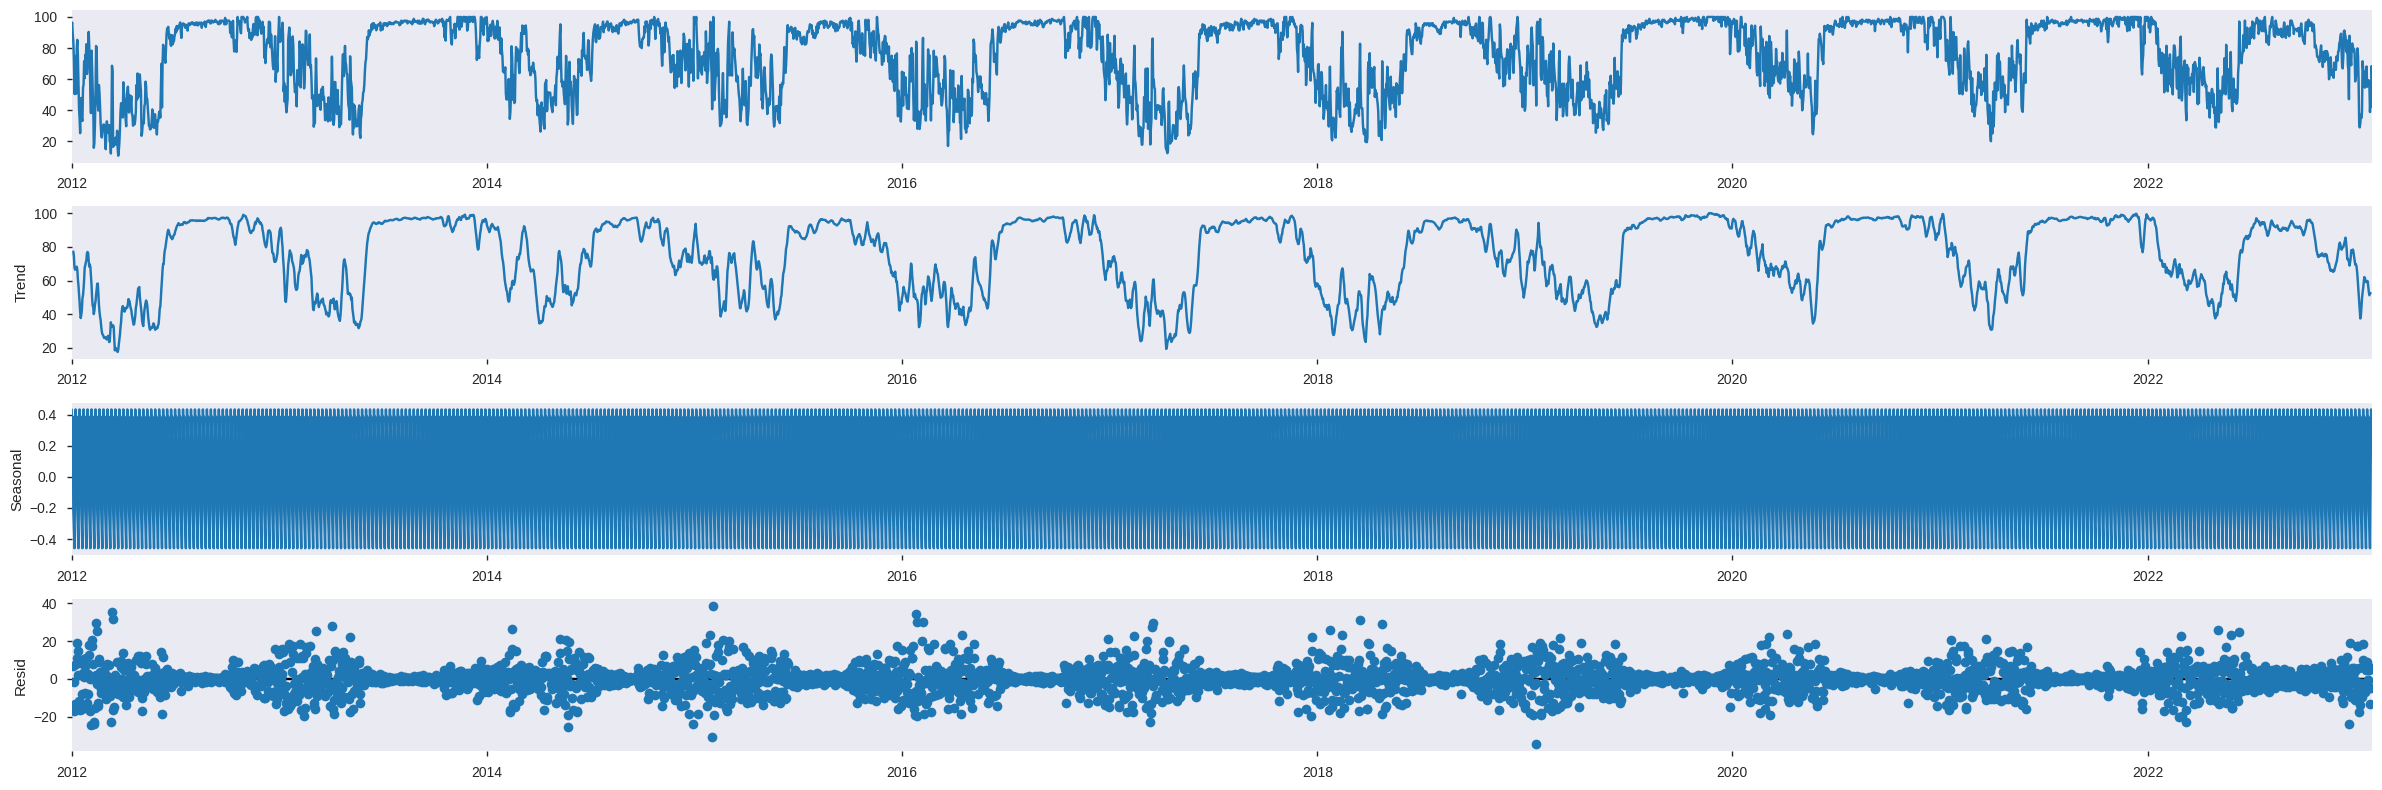

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = ts
result = seasonal_decompose(series, model='additive')
ax = result.plot()
ax

# humidity

## ADF (Augmented Dickey-Fuller) unit root test 
### The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.





In [ ]:
col = 'temp'
ts = df.loc[: , ['datetime' ,col ]]
ts['datetime'] =  pd.to_datetime(ts['datetime'])
ts = ts.set_index('datetime')
ts = ts.resample('D').max()
ts = ts.reindex()

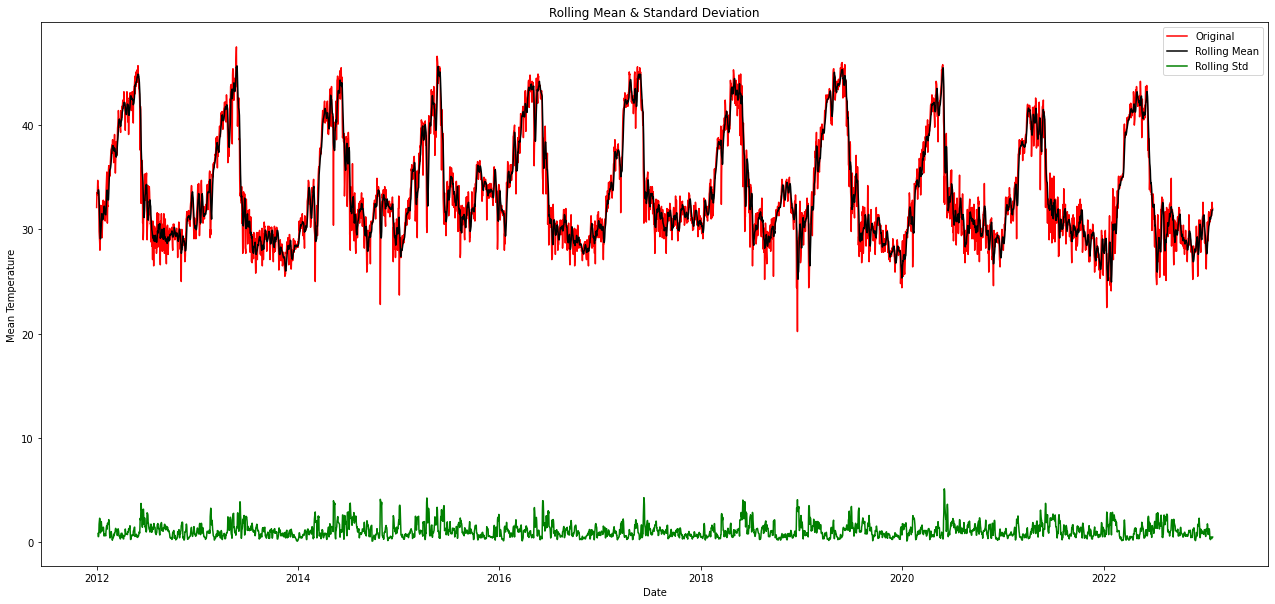

Test statistic:  -4.738893625728001
p-value:  7.107925895219949e-05
Critical Values: {'1%': -3.4319692672077773, '5%': -2.86225550364079, '10%': -2.5671508698651246}


In [ ]:

# adfuller library 
from statsmodels.tsa.stattools import adfuller

# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
  
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
      
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts[col])


### Moving average method
- Moving average method is a statistical technique used to analyze time-series data by smoothing out fluctuations in the data and highlighting any underlying trends or patterns.  The moving average method works by calculating the average of a specified number of past observations, and then using this average to forecast the next value in the series.

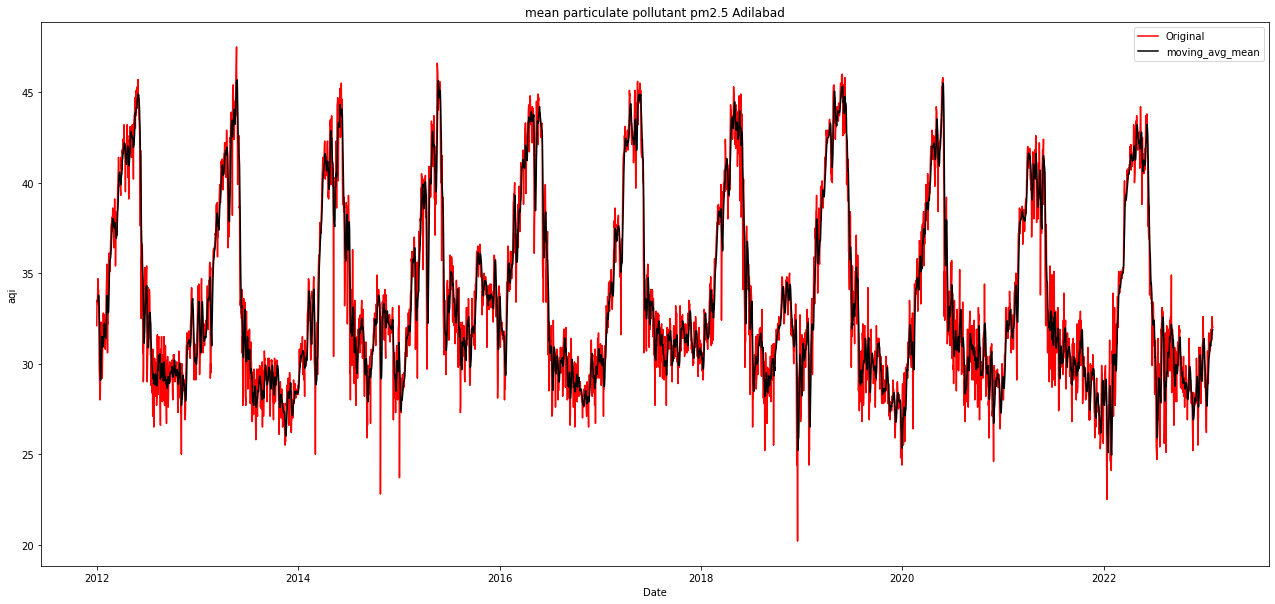

In [ ]:
# Moving average method
window_size = 6
moving_avg = ts.rolling(window_size).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("mean particulate pollutant pm2.5 Adilabad")
plt.xlabel("Date")
plt.ylabel("aqi")
plt.legend()
plt.show()

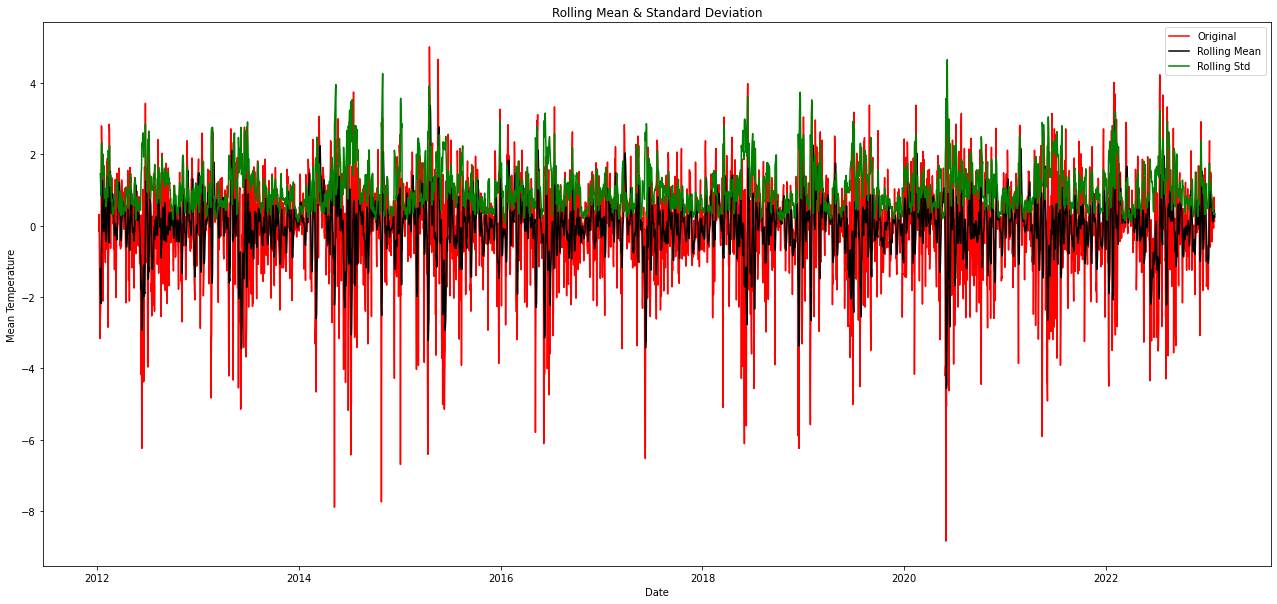

Test statistic:  -24.759782842307942
p-value:  0.0
Critical Values: {'1%': -3.4319708726559632, '5%': -2.8622562128450464, '10%': -2.5671512474148432}


In [ ]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size (000001) - type window

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff[col])

### Differencing method
- Differencing method is a statistical technique used to transform a non-stationary time-series into a stationary one by taking the difference between consecutive observations. This method is commonly used in time-series analysis to remove the trend or seasonality in the data and to make it suitable for further analysis and forecasting.



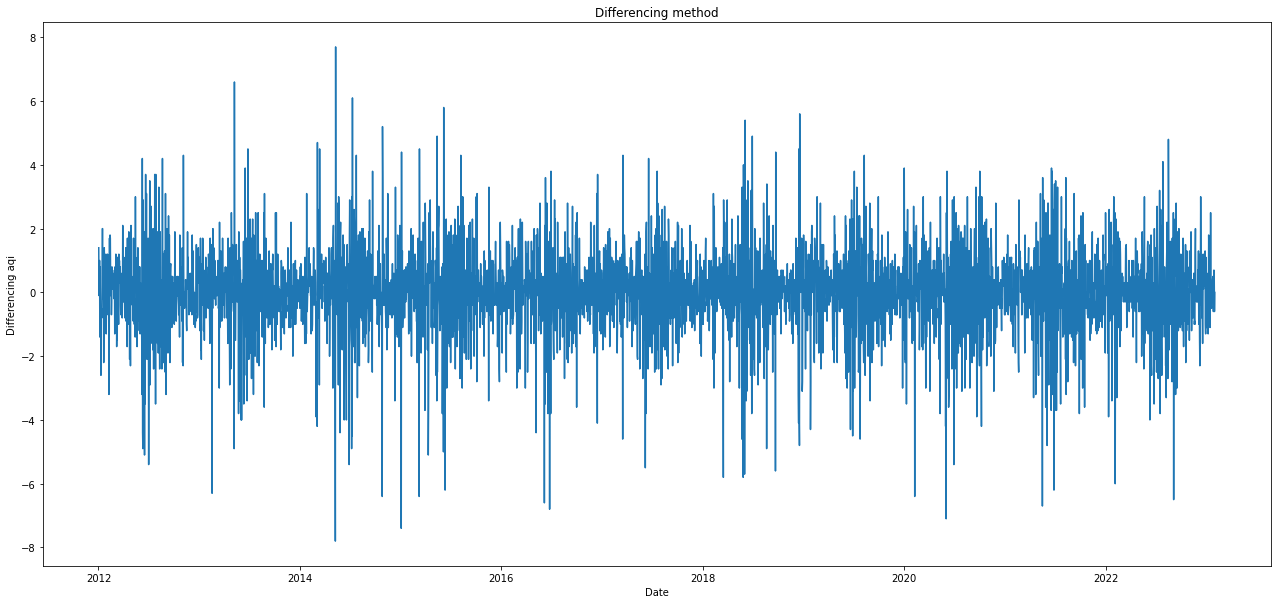

In [ ]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing aqi")
plt.show()


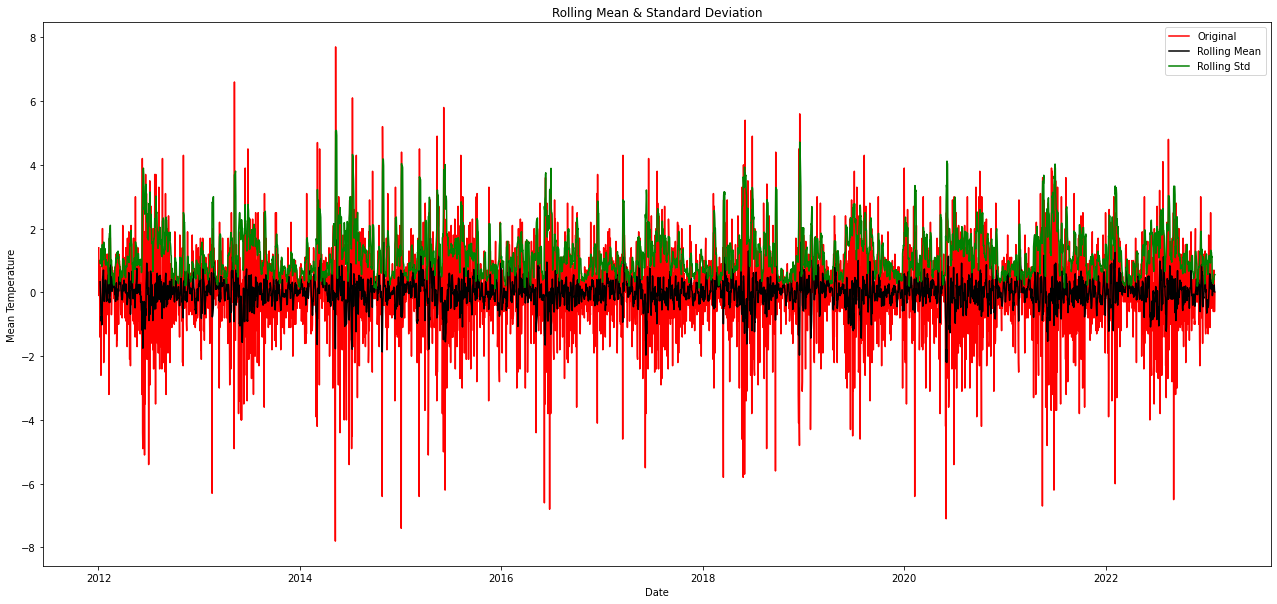

Test statistic:  -31.252827854778825
p-value:  0.0
Critical Values: {'1%': -3.4319692672077773, '5%': -2.86225550364079, '10%': -2.5671508698651246}


In [ ]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff[col])

In [ ]:
# ARIMA Prediction 

## Prediction with ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

<ipython-input-22-75537721b9e7>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


### Model fitting

In [ ]:
# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

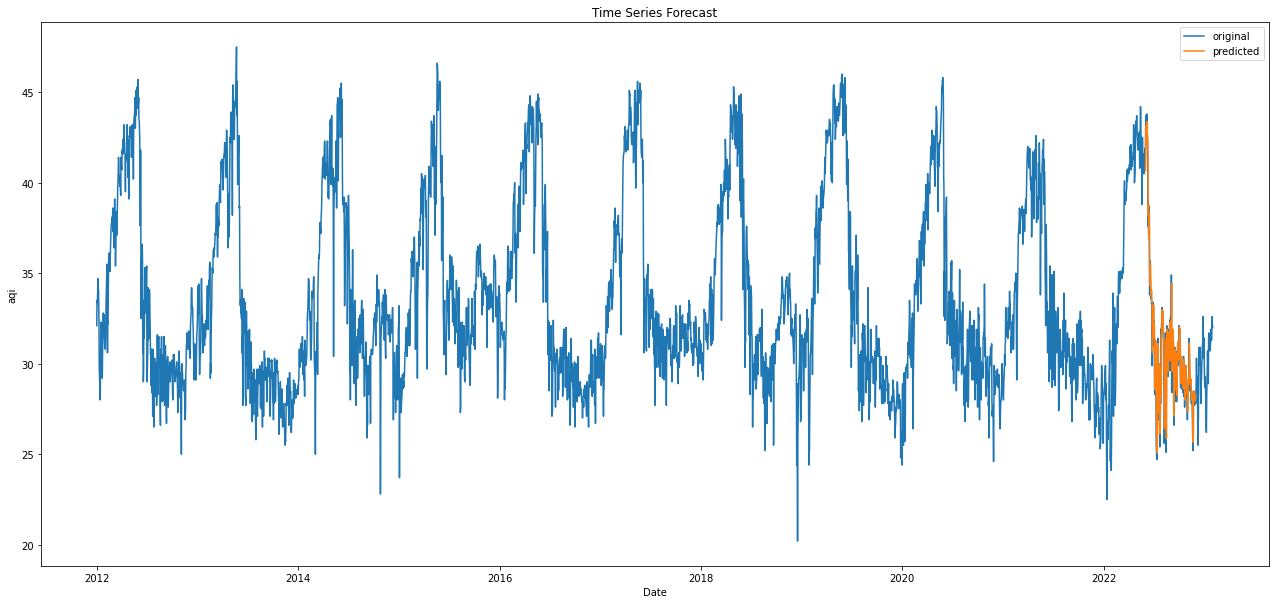

In [ ]:
# predict
start_index = datetime(2022, 6, 1)
end_index = datetime(2022, 11, 30)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts[col],label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("aqi")
plt.legend()
plt.show()

In [ ]:
ground_truth = ts.loc['2022-06-01':'2022-11-30']

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
score_mae = mean_absolute_error(ground_truth['temp'] , forecast)
score_rmse = math.sqrt(mean_squared_error(ground_truth['temp'] , forecast))
print( "MAE -", score_mae ,"|", "RMSE -", score_rmse)

MAE - 1.116668494760512 | RMSE - 1.4937978746560854


In [ ]:
#----#----#----#----#----#----#----#----#----#----#----
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ad_2.csv')

In [ ]:
col = 'temp'

In [ ]:
df_full = df

In [ ]:
df_full = df_full.set_index(df_full['datetime'])

In [ ]:
datetime = df_full['datetime']

In [ ]:
df_full = df_full[[col]]

In [ ]:
df21 = df_full

In [ ]:
df21.head(1)

temp
datetime                 
2012-01-01T00:00:00  22.7

In [ ]:
#--- hourly ------ 87672 rows × 2 columns
87672/365/24

10.008219178082191

In [ ]:
date_time = pd.to_datetime(df21.index)
date_time

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2023-01-31 14:00:00', '2023-01-31 15:00:00',
               '2023-01-31 16:00:00', '2023-01-31 17:00:00',
               '2023-01-31 18:00:00', '2023-01-31 19:00:00',
               '2023-01-31 20:00:00', '2023-01-31 21:00:00',
               '2023-01-31 22:00:00', '2023-01-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=97176, freq=None)

In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

Float64Index([1325376000.0, 1325379600.0, 1325383200.0, 1325386800.0,
              1325390400.0, 1325394000.0, 1325397600.0, 1325401200.0,
              1325404800.0, 1325408400.0,
              ...
              1675173600.0, 1675177200.0, 1675180800.0, 1675184400.0,
              1675188000.0, 1675191600.0, 1675195200.0, 1675198800.0,
              1675202400.0, 1675206000.0],
             dtype='float64', name='datetime', length=97176)

## converting time to signal 
#### Neural Networks uses time as a Feature 
#### To use time as a feature we convert it as signal and use its prediocity in the model 


In [ ]:
day = 24*60*60
year = (365.2425)*day

df21['d_sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df21['d_cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df21['y_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df21['y_cos'] = np.cos(timestamp_s * (2 * np.pi / year))


## Fast Fourier Transform (FFT)
### FFT can be used to calculate the cross-correlation between the two signals in the frequency domain.
The FFT is a fast and efficient algorithm for calculating the cross-correlation between two signals, making it a popular choice in many applications such as audio signal processing, image processing, and communication systems.






[    0     1     2 ... 48586 48587 48588] 8766.0576 11.085484996128704 [0.00000000e+00 9.02080514e-02 1.80416103e-01 ... 4.38284838e+03
 4.38293859e+03 4.38302880e+03]


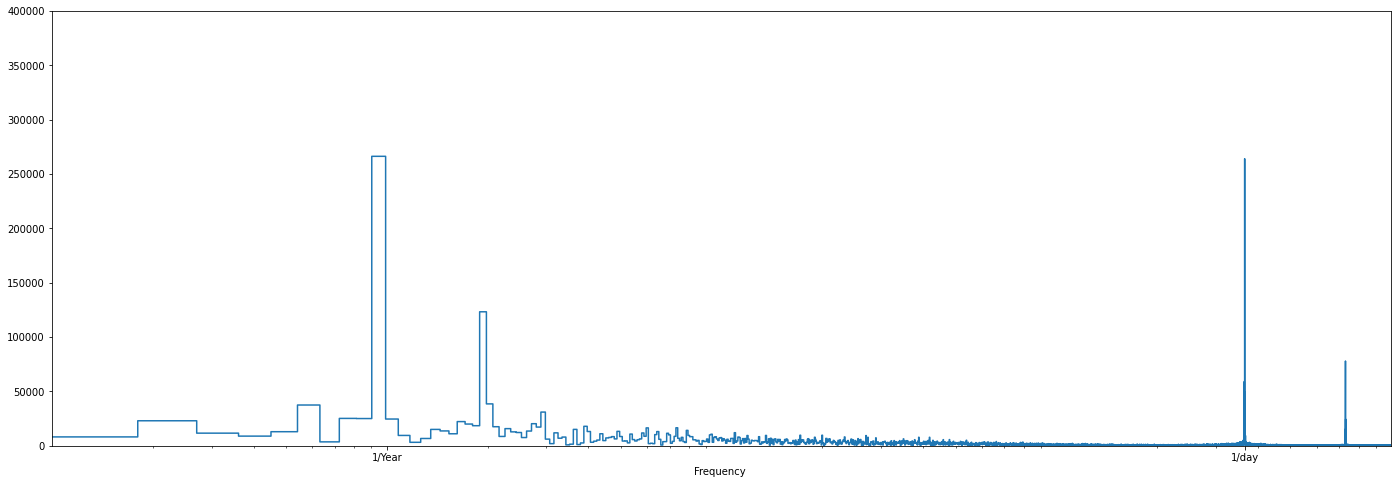

In [ ]:
fft = tf.signal.rfft(df21[col])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df21[col])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
print(f_per_dataset , hours_per_year ,years_per_dataset ,f_per_year)


plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, 1000])
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency ')

In [ ]:
df21 = df21.reset_index()

In [ ]:
df21.pop('datetime')

0        2012-01-01T00:00:00
1        2012-01-01T01:00:00
2        2012-01-01T02:00:00
3        2012-01-01T03:00:00
4        2012-01-01T04:00:00
                ...         
97171    2023-01-31T19:00:00
97172    2023-01-31T20:00:00
97173    2023-01-31T21:00:00
97174    2023-01-31T22:00:00
97175    2023-01-31T23:00:00
Name: datetime, Length: 97176, dtype: object

In [ ]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97176 entries, 0 to 97175
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    97176 non-null  float64
 1   d_sin   97176 non-null  float64
 2   d_cos   97176 non-null  float64
 3   y_sin   97176 non-null  float64
 4   y_cos   97176 non-null  float64
dtypes: float64(5)
memory usage: 3.7 MB


In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df21)
train_df = df21[0:int(n*0.7)]
val_df = df21[int(n*0.7):int(n*0.9)]
test_df = df21[int(n*0.9):]

num_features = df21.shape[1]

print(train_df.shape , val_df.shape , test_df.shape)

(68023, 5) (19435, 5) (9718, 5)


# Normalize

 It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

 The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.



In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
train_std

temp     6.594345
d_sin    0.707112
d_cos    0.707112
y_sin    0.707253
y_cos    0.706413
dtype: float64

In [ ]:
train_df

temp     d_sin     d_cos     y_sin     y_cos
0     -0.716970 -0.000089  1.414114 -0.031775  1.444475
1     -0.777628  0.365933  1.365926 -0.030762  1.444478
2     -0.868615  0.707012  1.224647 -0.029748  1.444480
3     -0.898944  0.999903  0.999903 -0.028735  1.444481
4     -0.898944  1.224647  0.707012 -0.027721  1.444482
...         ...       ...       ...       ...       ...
68018 -0.701805  0.707012  1.224647 -1.438961  0.108444
68019 -0.762463  0.999903  0.999903 -1.438904  0.109457
68020 -0.807957  1.224647  0.707012 -1.438846  0.110470
68021 -0.853450  1.365926  0.365933 -1.438787  0.111483
68022 -0.883779  1.414114 -0.000089 -1.438727  0.112496

[68023 rows x 5 columns]

In [ ]:
df_std = (df21 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

 ### Feature Distribution
 - Understanding the distribution of features is important for various tasks in data analysis, such as identifying outliers, selecting appropriate statistical tests, and building machine learning models.

 - Below is the plot:


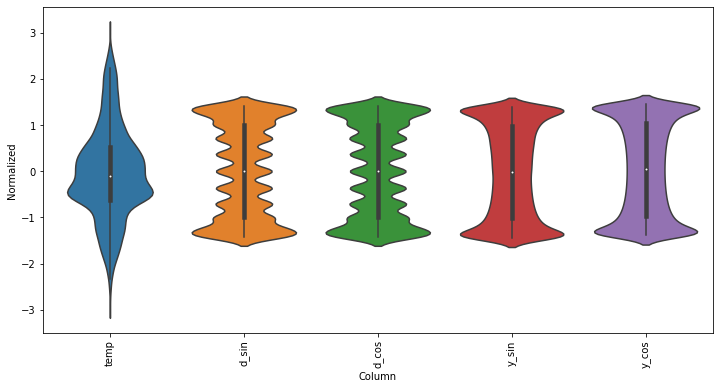

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df21.keys(), rotation=90)

# Data windowing - 
 
The process of windowing involves selecting a window size and sliding the window along the time axis of the data sequence. At each position, the data within the window is analyzed or processed, often using techniques such as Fourier analysis, wavelet analysis, or statistical analysis.
The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data.

The main features of the input windows are:

*   The width (number of time steps) of the input and label windows.
*   The time offset between them.
*   Which features are used as inputs, labels, or both.
   
This will builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both.
Single-output, and multi-output predictions.
Single-time-step and multi-time-step predictions.
This section focuses on implementing the data windowing so that it can be reused for all of those models.



##### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### 1. Indexes and offsets
Start by creating the ***WindowGenerator*** class. The __init__ method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to tf.data.Datasets of windows later.

### 2. Split
Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.

### 3. Plot
The plot function will provide a simple visualization of the split window
 





In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns

    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    return inputs, labels
    

  # WindowGenerator.split_window = split_window

  def plot(self, model=None, plot_col=col, max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')

  # WindowGenerator.plot = plot

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result


## Fitting and Compiling
### Defining Model Hyperparameters

In [ ]:
MAX_EPOCHS = 5

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Total window size: 395
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

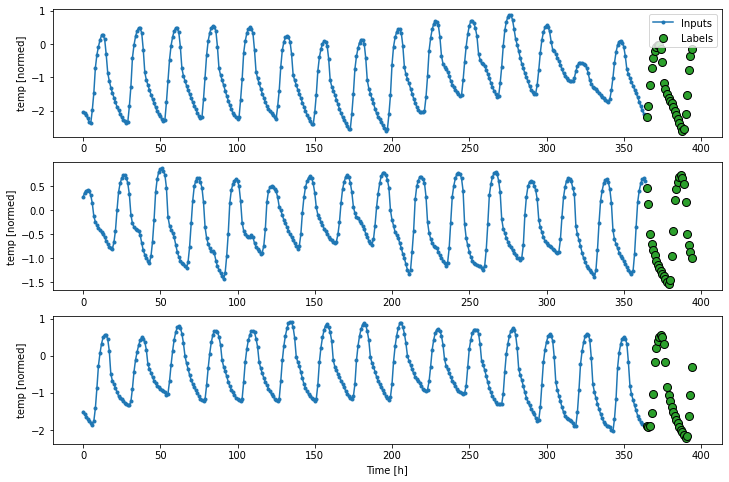

In [ ]:
OUT_STEPS = 30
multi_window = WindowGenerator(input_width=365,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window


## Multi-step models
Both the single-output and multiple-output models in the previous sections made single time step predictions, one hour into the future.

This section looks at how to expand these models to make multiple time step predictions.

In a multi-step prediction, the model needs to learn to predict a range of future values. Thus, unlike a single step model, where only a single future point is predicted, a multi-step model predicts a sequence of the future values.

There are two rough approaches to this:

* Single shot predictions where the entire time series is predicted at once.
* Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.

In this section all the models will predict all the features across all output time steps.

For the multi-step model, the training data again consists of hourly samples. However, here, the models will learn to predict 24 hours into the future, given 24 hours of the past.
 

### Baseline

596/596 [==============================] - 3s 4ms/step - loss: 0.8567 - mean_absolute_error: 0.5601


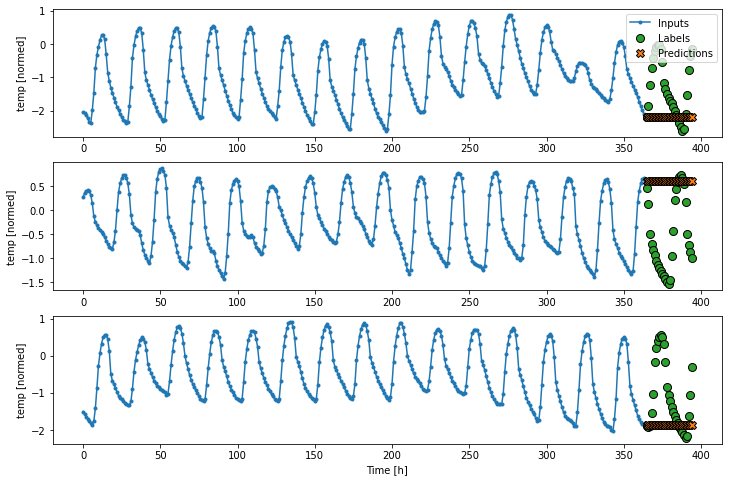

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

### Single-shot models
One high-level approach to this problem is to use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

This can be implemented efficiently as a tf.keras.layers.Dense with OUT_STEPS*features output units. The model just needs to reshape that output to the required (OUTPUT_STEPS, features).

#### Linear model
A simple linear model based on the last input time step does better than either baseline, but is underpowered. The model needs to predict OUTPUT_STEPS time steps, from a single input time step with a linear projection. It can only capture a low-dimensional slice of the behavior, likely based mainly on the time of day and time of year.

 



Epoch 1/5
2114/2114 [==============================] - 11s 5ms/step - loss: 0.1769 - mean_absolute_error: 0.2921 - val_loss: 0.0328 - val_mean_absolute_error: 0.0968
Epoch 2/5
2114/2114 [==============================] - 9s 4ms/step - loss: 0.0329 - mean_absolute_error: 0.0722 - val_loss: 0.0300 - val_mean_absolute_error: 0.0607
Epoch 3/5
2114/2114 [==============================] - 9s 4ms/step - loss: 0.0324 - mean_absolute_error: 0.0633 - val_loss: 0.0300 - val_mean_absolute_error: 0.0606
Epoch 4/5
2114/2114 [==============================] - 10s 5ms/step - loss: 0.0324 - mean_absolute_error: 0.0633 - val_loss: 0.0300 - val_mean_absolute_error: 0.0606
Epoch 5/5
596/596 [==============================] - 3s 4ms/step - loss: 0.0300 - mean_absolute_error: 0.0606


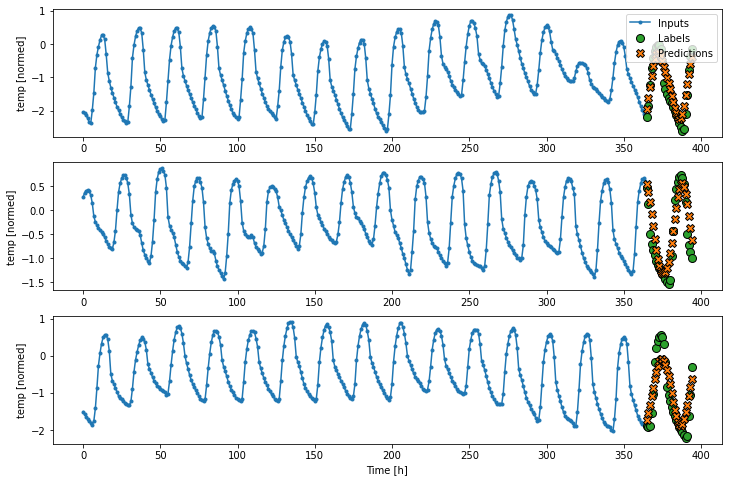

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### Dense
Adding a tf.keras.layers.Dense between the input and output gives the linear model more power, but is still only based on a single input time step.



Here's a model similar to the linear model, except it stacks several a few Dense layers between the input and the output:


 


Epoch 1/5
2114/2114 [==============================] - 11s 5ms/step - loss: 0.0211 - mean_absolute_error: 0.0552 - val_loss: 0.0150 - val_mean_absolute_error: 0.0457
Epoch 2/5
2114/2114 [==============================] - 11s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0377 - val_loss: 0.0143 - val_mean_absolute_error: 0.0440
Epoch 3/5
2114/2114 [==============================] - 12s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0366 - val_loss: 0.0147 - val_mean_absolute_error: 0.0445
Epoch 4/5
596/596 [==============================] - 2s 3ms/step - loss: 0.0149 - mean_absolute_error: 0.0454


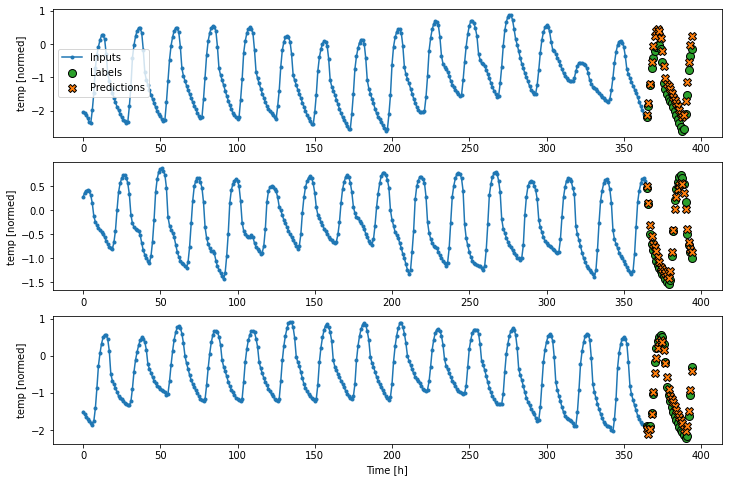

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

# Convolution Neural Network
Convolution layer (tf.keras.layers.Conv1D) also takes multiple time steps as input to each prediction.

Below is the same model as multi_step_dense, re-written with a convolution.



Epoch 1/5
2114/2114 [==============================] - 11s 5ms/step - loss: 0.0221 - mean_absolute_error: 0.0580 - val_loss: 0.0144 - val_mean_absolute_error: 0.0473
Epoch 2/5
2114/2114 [==============================] - 10s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0391 - val_loss: 0.0139 - val_mean_absolute_error: 0.0454
Epoch 3/5
2114/2114 [==============================] - 9s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0380 - val_loss: 0.0137 - val_mean_absolute_error: 0.0438
Epoch 4/5
2114/2114 [==============================] - 10s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0375 - val_loss: 0.0138 - val_mean_absolute_error: 0.0442
Epoch 5/5
596/596 [==============================] - 2s 3ms/step - loss: 0.0136 - mean_absolute_error: 0.0452


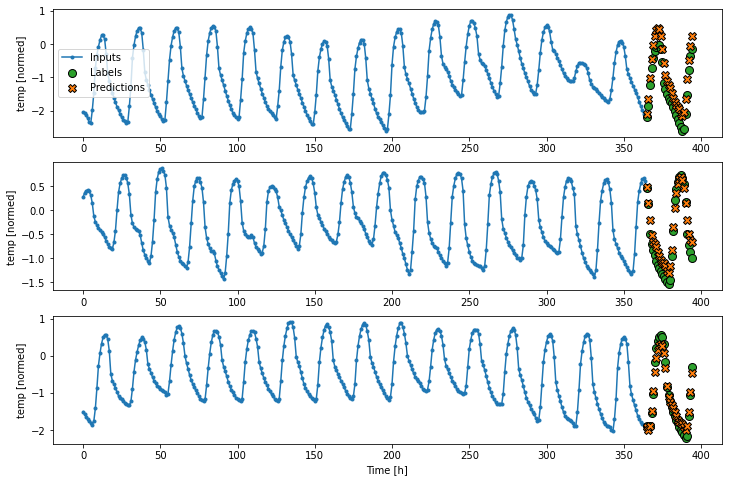

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)


multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#Recurrent neural network
A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

Below is the working:

Epoch 1/5
2114/2114 [==============================] - 227s 106ms/step - loss: 0.0492 - mean_absolute_error: 0.1018 - val_loss: 0.0124 - val_mean_absolute_error: 0.0522
Epoch 2/5
2114/2114 [==============================] - 216s 102ms/step - loss: 0.0087 - mean_absolute_error: 0.0447 - val_loss: 0.0105 - val_mean_absolute_error: 0.0471
Epoch 3/5
2114/2114 [==============================] - 221s 104ms/step - loss: 0.0076 - mean_absolute_error: 0.0406 - val_loss: 0.0096 - val_mean_absolute_error: 0.0428
Epoch 4/5
2114/2114 [==============================] - 249s 118ms/step - loss: 0.0071 - mean_absolute_error: 0.0378 - val_loss: 0.0093 - val_mean_absolute_error: 0.0406
Epoch 5/5
596/596 [==============================] - 14s 24ms/step - loss: 0.0094 - mean_absolute_error: 0.0401


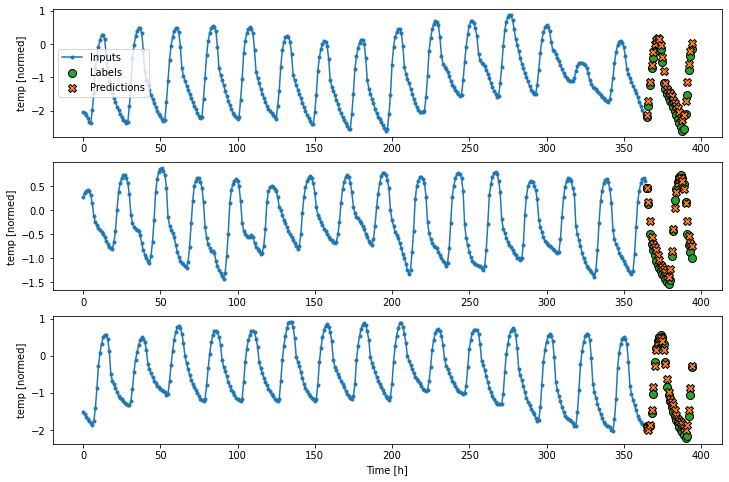

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)


multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

# Autoregressive RNN
The model will have the same basic form as the single-step LSTM models from earlier: a tf.keras.layers.LSTM layer followed by a tf.keras.layers.Dense layer that converts the LSTM layer's outputs to model predictions.



In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 30, 5)


# AR LSTM

Epoch 1/5
2114/2114 [==============================] - 232s 107ms/step - loss: 0.0475 - mean_absolute_error: 0.0999 - val_loss: 0.0135 - val_mean_absolute_error: 0.0555
Epoch 2/5
2114/2114 [==============================] - 226s 107ms/step - loss: 0.0093 - mean_absolute_error: 0.0480 - val_loss: 0.0132 - val_mean_absolute_error: 0.0576
Epoch 3/5
2114/2114 [==============================] - 235s 111ms/step - loss: 0.0088 - mean_absolute_error: 0.0458 - val_loss: 0.0125 - val_mean_absolute_error: 0.0507
Epoch 4/5
2114/2114 [==============================] - 229s 109ms/step - loss: 0.0084 - mean_absolute_error: 0.0445 - val_loss: 0.0120 - val_mean_absolute_error: 0.0521
Epoch 5/5
596/596 [==============================] - 16s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0473


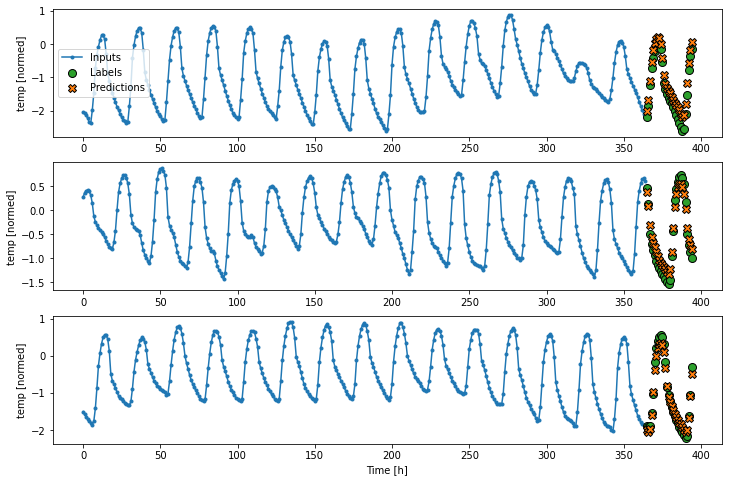

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

## Performance

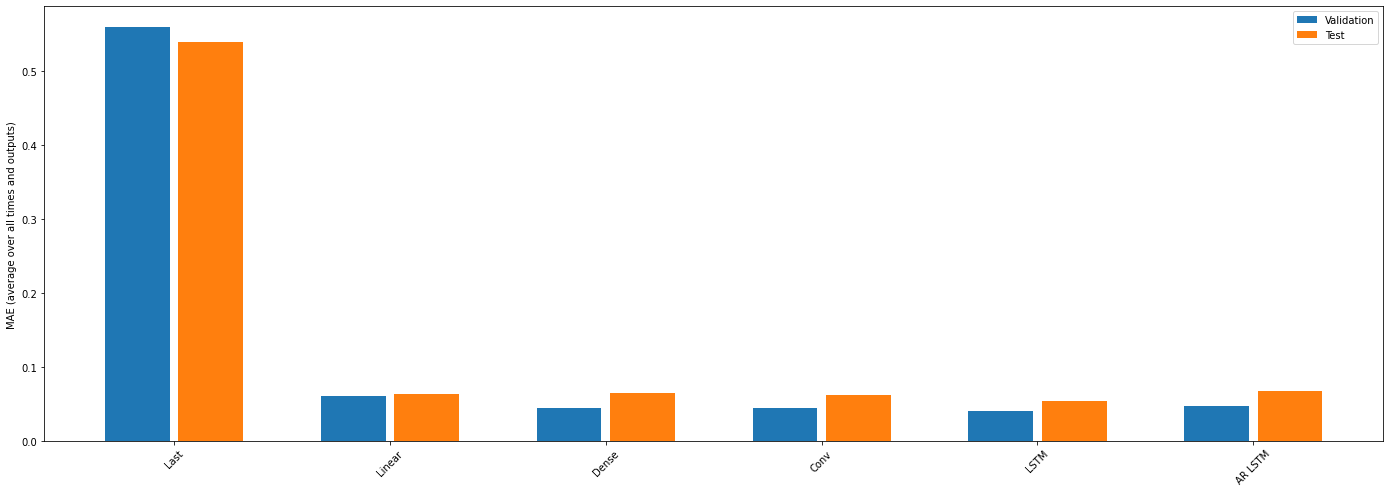

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
# metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[1] for v in multi_val_performance.values()]
test_mae = [v[1] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
#----------?#----------?#----------?#----------?#----------?#----------?#----------?#----------?

#Forecasting with Meta's Prophet

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime as dt

import pandas as pd

from prophet import *
# from 

import pyarrow.parquet as pq
# from download import download

mpl.rcParams['figure.figsize'] = (24, 8)
mpl.rcParams['axes.grid'] = False

from prophet.plot import *


### Data Preprocessing for prophet

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ad_2.csv')

In [ ]:
df['datetime'] =  pd.to_datetime(df['datetime'])

In [ ]:
df.shape

(97176, 27)

In [ ]:
col = 'temp'

df = df[[col , 'datetime']]
df['datetime'] =  pd.to_datetime(df['datetime'])
#-------
df = df.set_index('datetime')
df = df.resample('d').max()
df = df.reset_index()
#---------
df['ds'] = df['datetime']
df = df.rename({col : 'y'}, axis = 'columns')

<ipython-input-5-dc4cbbd67f74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] =  pd.to_datetime(df['datetime'])


In [ ]:
param_best = {
    'changepoint_prior_scale':0.001,
    'seasonality_prior_scale':0.01      
}

# Prophet
Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

### Baseline model

In [ ]:
m_b = Prophet(
    **param_best
)
m_b.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplds0_erj/nitofv_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplds0_erj/lnp8mqtr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63713', 'data', 'file=/tmp/tmplds0_erj/nitofv_4.json', 'init=/tmp/tmplds0_erj/lnp8mqtr.json', 'output', 'file=/tmp/tmplds0_erj/prophet_model8r00uxq4/prophet_model-20230302170018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m_b.make_future_dataframe(periods = 365)
forecast = m_b.predict(future)

In [ ]:
from prophet.plot import *
import plotly.express as px

In [ ]:
plot_plotly(m_b, forecast)

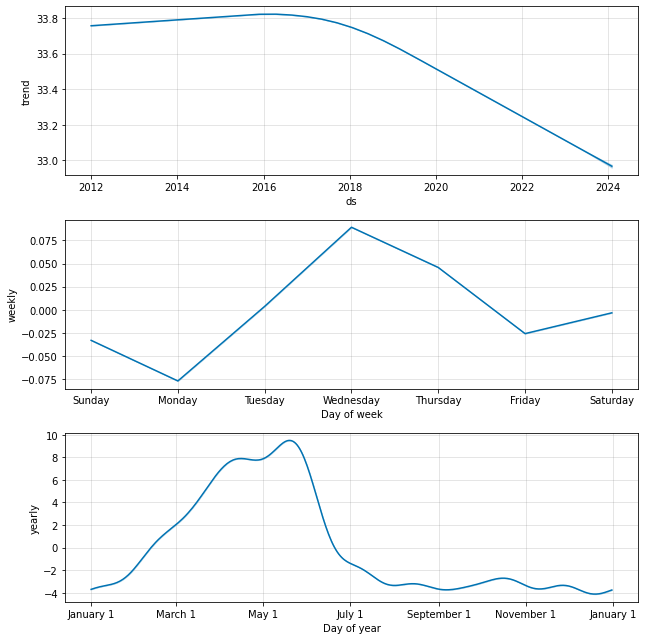

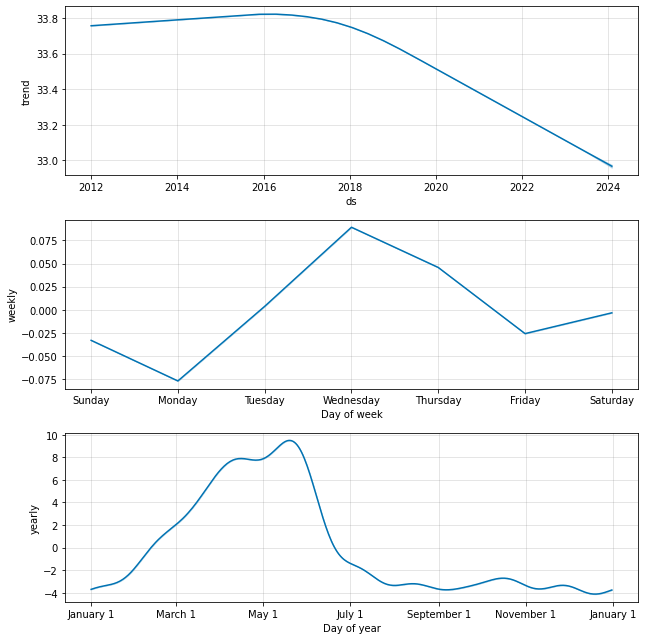

In [ ]:
m_b.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
fcst_cut = forecast.loc[forecast['ds'] <= '2023-01-31']

In [ ]:
# Metrics are calculated over a rolling window of cross validation
# predictions, after sorting by horizon. Averaging is first done within each
# value of horizon, and then across horizons as needed to reach the window
# size. The size of that window (number of simulated forecast points) is
# determined by the rolling_window argument, which specifies a proportion of
# simulated forecast points to include in each window. rolling_window=0 will
# compute it separately for each horizon. The default of rolling_window=0.1
# will use 10% of the rows in df in each window. rolling_window=1 will
# compute the metric across all simulated forecast points. The results are
# set to the right edge of the window.

In [ ]:
score_mae = mean_absolute_error(df['y'] , fcst_cut['yhat'])
score_rmse = math.sqrt(mean_squared_error(df['y'] , fcst_cut['yhat']))
print( "MAE -", score_mae ,"|", "RMSE -", score_rmse)

MAE - 1.7046813043294762 | RMSE - 2.208833080192651


In [ ]:
m2 = Prophet(seasonality_mode='multiplicative',
                weekly_seasonality=True,
                daily_seasonality=False,
                # changepoint_prior_scale=0.001,
                # seasonality_prior_scale=0.01,
             )
m2.add_seasonality(name='yearly', period=365, fourier_order=20)

In [ ]:
m2.fit(df)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplds0_erj/wl78jgfm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplds0_erj/482wm0pj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93015', 'data', 'file=/tmp/tmplds0_erj/wl78jgfm.json', 'init=/tmp/tmplds0_erj/482wm0pj.json', 'output', 'file=/tmp/tmplds0_erj/prophet_model8_qxhqcj/prophet_model-20230302172844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = m2.make_future_dataframe(periods=365)

future_dates['yearly'] = future_dates['ds'].apply(lambda x: x.year - 4)
forecast = m2.predict(future_dates)


In [ ]:
plot_components_plotly(m2, forecast)

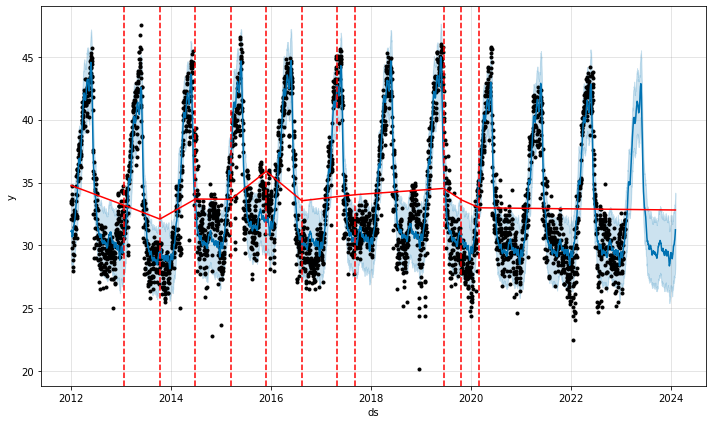

In [ ]:
fig = m2.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

In [ ]:
fcst_cut2 = forecast.loc[forecast['ds'] <= '2023-01-31']

In [ ]:
score_mae = mean_absolute_error(df['y'] , fcst_cut2['yhat'])
score_rmse = math.sqrt(mean_squared_error(df['y'] , fcst_cut2['yhat']))
print( "MAE -", score_mae ,"|", "RMSE -", score_rmse)

MAE - 1.5266620732272655 | RMSE - 2.0099084440588633


In [ ]:
# prophet cross Validation
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []
horizons =[]
mses=[]
maes=[]
mapes=[]
mdapes=[]
smapes=[]
coverages=[]
  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params,
                seasonality_mode='multiplicative',
                weekly_seasonality=True,
                daily_seasonality=False,
                )
    m.add_seasonality(name='yearly', period=365, fourier_order=20)
    m.fit(df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    
    horizons.append(df_p['horizon'].values[0] , )
    rmses.append(df_p['rmse'].values[0] , )
    mses.append(df_p['mse'].values[0] , )
    maes.append(df_p['mae'].values[0] , )
    mapes.append(df_p['mape'].values[0] , )
    mdapes.append(df_p['mdape'].values[0] , )
    smapes.append(df_p['smape'].values[0] , )
    coverages.append(df_p['coverage'].values[0] , )


# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['horizon'] = horizons
tuning_results['rmse'] = rmses
tuning_results['mse'] = mses
tuning_results['mae'] = maes
tuning_results['mape'] = mapes
tuning_results['mdape'] = mdapes
tuning_results['smape'] = smapes
tuning_results['coverage'] = coverages

print(tuning_results)

In [ ]:
tuning_results

changepoint_prior_scale  seasonality_prior_scale  horizon      rmse  \
0                     0.001                     0.01 365 days  2.444651   
1                     0.001                     0.10 365 days  2.443086   
2                     0.001                     1.00 365 days  2.444627   
3                     0.001                    10.00 365 days  2.433237   
4                     0.010                     0.01 365 days  2.715696   
5                     0.010                     0.10 365 days  2.755425   
6                     0.010                     1.00 365 days  2.759112   
7                     0.010                    10.00 365 days  2.746057   
8                     0.100                     0.01 365 days  3.948789   
9                     0.100                     0.10 365 days  3.525052   
10                    0.100                     1.00 365 days  3.534575   
11                    0.100                    10.00 365 days  3.483226   
12                    0.500                     0.01 365 days  4.649117   
13                    0.500                     0.10 365 days  4.000851   
14                    0.500                     1.00 365 days  3.936991   
15                    0.500                    10.00 365 days  3.878210   

          mse       mae      mape     mdape     smape  coverage  
0    5.976320  1.884648  0.058407  0.044482  0.057190  0.770046  
1    5.968669  1.873960  0.057954  0.043459  0.056866  0.774429  
2    5.976200  1.874815  0.058012  0.043559  0.056898  0.772603  
3    5.920640  1.866079  0.057710  0.043341  0.056644  0.774977  
4    7.375007  2.127676  0.065134  0.051407  0.064067  0.686210  
5    7.592367  2.157038  0.065899  0.052312  0.064825  0.681279  
6    7.612699  2.160022  0.065959  0.052296  0.064939  0.682557  
7    7.540828  2.144818  0.065553  0.051851  0.064446  0.688584  
8   15.592933  2.883993  0.087309  0.060165  0.089371  0.710502  
9   12.425990  2.709920  0.081934  0.061624  0.081764  0.694247  
10  12.493223  2.716117  0.082119  0.061521  0.081992  0.692968  
11  12.132861  2.684907  0.081192  0.061345  0.080872  0.697900  
12  21.614293  3.357770  0.100325  0.069160  0.103343  0.808950  
13  16.006809  2.899233  0.088051  0.062452  0.089309  0.876164  
14  15.499897  2.869988  0.087199  0.061938  0.088044  0.876347  
15  15.040509  2.832825  0.086108  0.061499  0.086920  0.879635

# Neural Prophet
 
NeuralProphet is an easy to learn framework for interpretable time series forecasting. NeuralProphet is built on PyTorch and combines Neural Network and traditional time-series algorithms, inspired by Facebook Prophet and AR-Net.

With few lines of code, you can define, customize, visualize, and evaluate your own forecasting models.

It is designed for iterative human-in-the-loop model building. That means that you can build a first model quickly, interpret the results, improve, repeat. Due to the focus on interpretability and customization-ability, NeuralProphet may not be the most accurate model out-of-the-box; so, don't hesitate to adjust and iterate until you like your results.
 

In [ ]:
#!pip install neuralprophet[live]

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime as dt

import pandas as pd

from prophet import *
# from 

import pyarrow.parquet as pq


# from download import download

mpl.rcParams['figure.figsize'] = (24, 8)
mpl.rcParams['axes.grid'] = False

horizon = 365

from prophet.plot import *
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ad_2.csv')


In [ ]:
col = 'temp'

df = df[[col , 'datetime']]
df['datetime'] =  pd.to_datetime(df['datetime'])
#-------
df = df.set_index('datetime')
df = df.resample('d').max()
df = df.reset_index()
#---------
df['ds'] = df['datetime']
df = df.rename({col : 'y'}, axis = 'columns')

In [ ]:
# baseline  model

In [ ]:
m = NeuralProphet()


In [ ]:
metrics = m.fit(df)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.co

Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
metrics

MAE       RMSE      Loss  RegLoss  epoch
0    19.416658  23.267410  0.340976      0.0      0
1    17.473658  21.059425  0.286753      0.0      1
2    14.960683  18.226986  0.219771      0.0      2
3    11.566272  14.216311  0.138164      0.0      3
4     7.760407   9.528221  0.062432      0.0      4
..         ...        ...       ...      ...    ...
125   1.566944   2.035484  0.002932      0.0    125
126   1.561878   2.039447  0.002924      0.0    126
127   1.562504   2.033881  0.002927      0.0    127
128   1.561576   2.031909  0.002918      0.0    128
129   1.560876   2.037182  0.002918      0.0    129

[130 rows x 5 columns]

In [ ]:
forecast = m.predict(df)


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 127it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
forecast

ds     y      yhat1      trend  season_yearly  season_weekly
0    2012-01-01  32.1  30.450855  34.632572      -4.160094      -0.021623
1    2012-01-02  33.5  30.414940  34.629688      -4.130197      -0.084551
2    2012-01-03  33.4  30.559246  34.626801      -4.096045       0.028488
3    2012-01-04  33.7  30.648544  34.623917      -4.057686       0.082311
4    2012-01-05  34.7  30.646896  34.621033      -4.015192       0.041058
...         ...   ...        ...        ...            ...            ...
4044 2023-01-27  31.3  30.613140  32.967976      -2.302315      -0.052522
4045 2023-01-28  32.0  30.770504  32.968140      -2.204476       0.006840
4046 2023-01-29  32.6  30.841190  32.968304      -2.105489      -0.021623
4047 2023-01-30  32.0  30.878590  32.968468      -2.005327      -0.084551
4048 2023-01-31  32.0  31.093178  32.968632      -1.903944       0.028488

[4049 rows x 6 columns]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


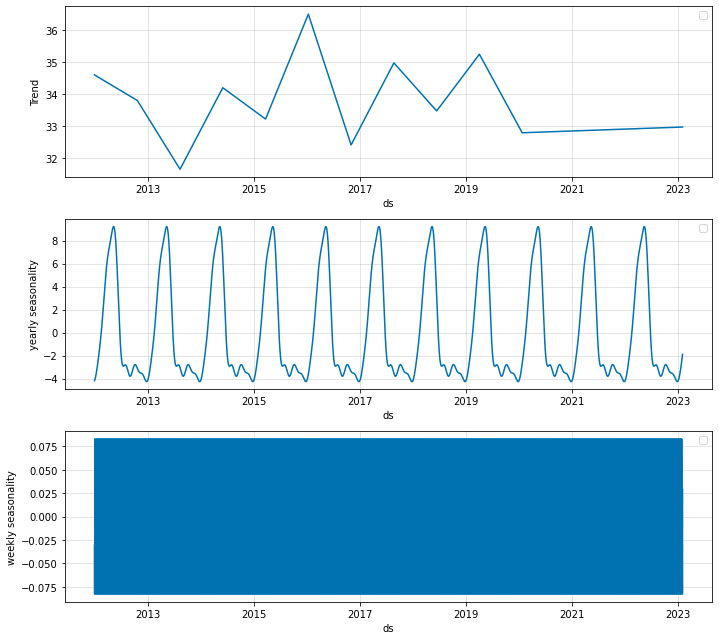

In [ ]:
fig_comp = m.plot_components(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


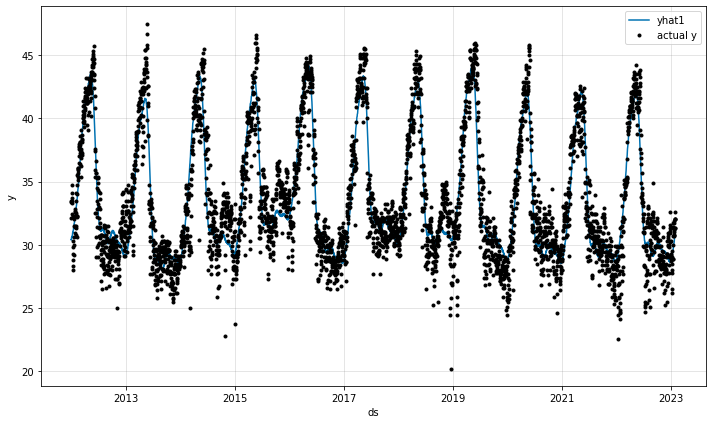

In [ ]:
forecasts_plot = m.plot(forecast)

In [ ]:
metrics.iloc[-1]

MAE          1.378637
RMSE         1.784110
Loss         0.002351
RegLoss      0.000000
epoch      140.000000
Name: 140, dtype: float64

WARNING - (NP.forecaster.plot_last_forecast) - plot_last_forecast() has been renamed to plot_latest_forecast() and is therefore deprecated. Please use plot_latst_forecast() in the future
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


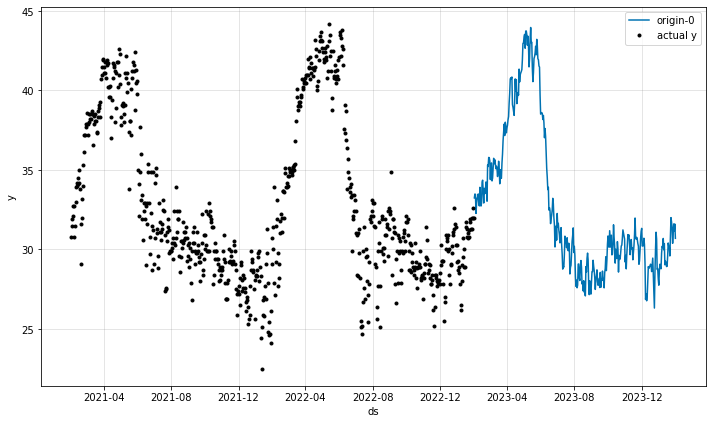

In [ ]:
mnp2 = mnp2.highlight_nth_step_ahead_of_each_forecast(None)  # reset highlight
fig = mnp2.plot_last_forecast(forecast)


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


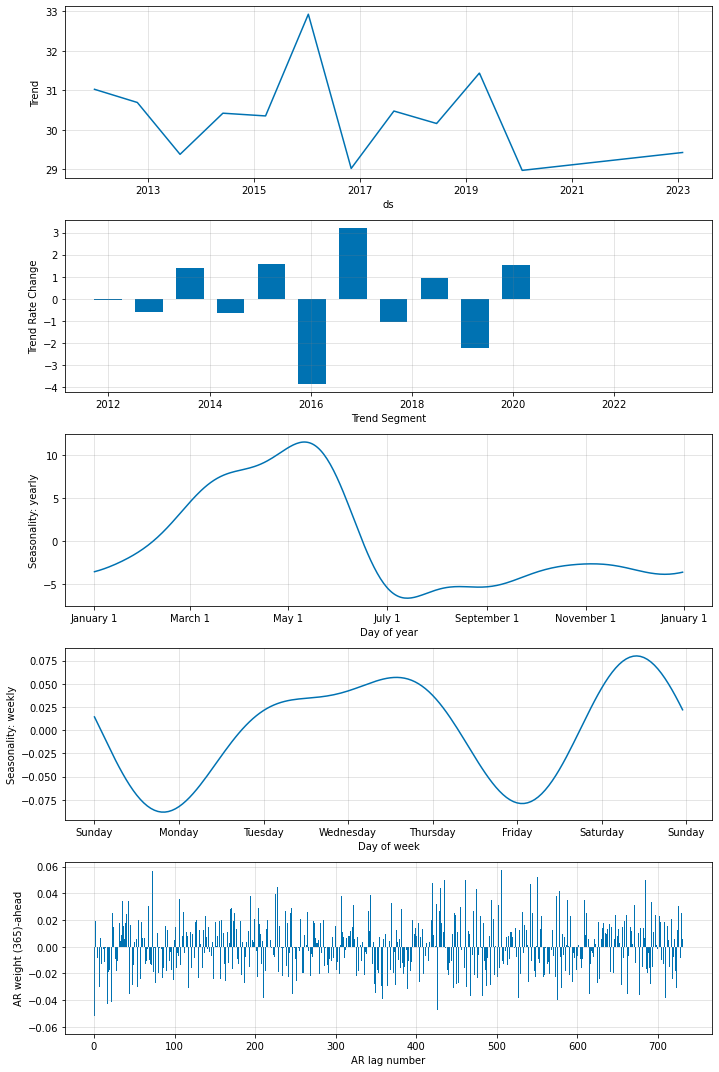

In [ ]:
mnp2 = mnp2.highlight_nth_step_ahead_of_each_forecast(365)
fig_param = mnp2.plot_parameters()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.968% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.968% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.co

Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

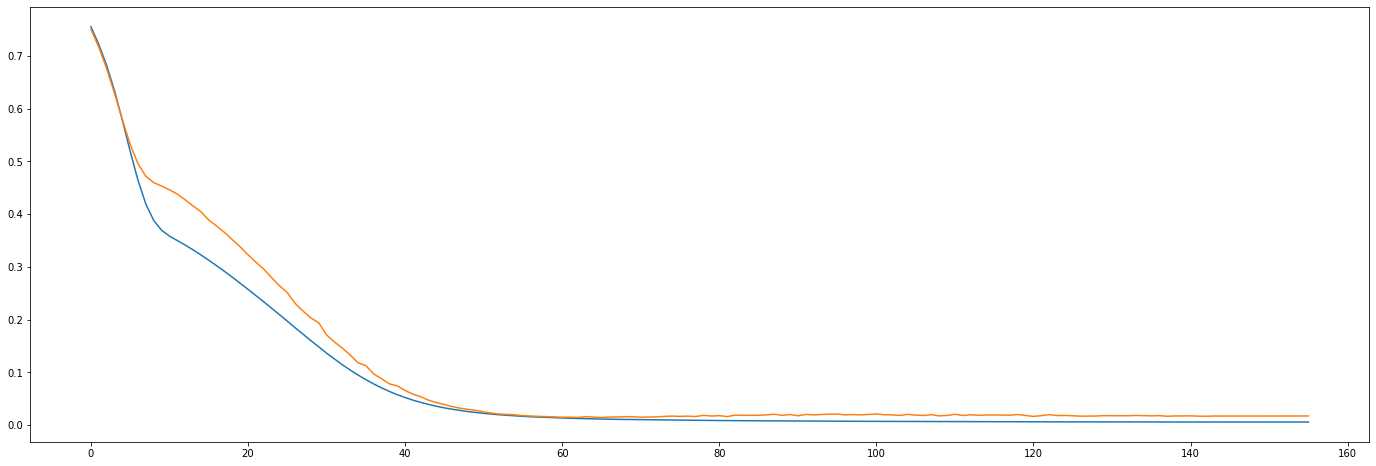

In [ ]:
metrics = mnp3.fit(
    df_train,
     validation_df=df_test,
      progress="plot"
      )

In [ ]:
metrics

MAE_val   RMSE_val  Loss_val  RegLoss_val  epoch        MAE       RMSE  \
0    27.328556  33.856407  0.750216          0.0      0  31.810171  38.918812   
1    26.441771  32.868103  0.716200          0.0      1  30.768135  37.783924   
2    25.381948  31.667152  0.675663          0.0      2  29.529469  36.414112   
3    24.147852  30.244217  0.628701          0.0      3  28.013620  34.701538   
4    22.824144  28.691450  0.578644          0.0      4  26.242569  32.648903   
..         ...        ...       ...          ...    ...        ...        ...   
151   3.677299   4.383480  0.017397          0.0    151   2.259652   2.854900   
152   3.680107   4.386274  0.017419          0.0    152   2.259810   2.854961   
153   3.680286   4.386459  0.017421          0.0    153   2.259613   2.854475   
154   3.680671   4.386865  0.017424          0.0    154   2.259311   2.854408   
155   3.680189   4.386371  0.017420          0.0    155   2.259286   2.854385   

         Loss  RegLoss  
0    0.755021      0.0  
1    0.721394      0.0  
2    0.681747      0.0  
3    0.633625      0.0  
4    0.577745      0.0  
..        ...      ...  
151  0.005968      0.0  
152  0.005966      0.0  
153  0.005966      0.0  
154  0.005965      0.0  
155  0.005965      0.0  

[156 rows x 9 columns]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


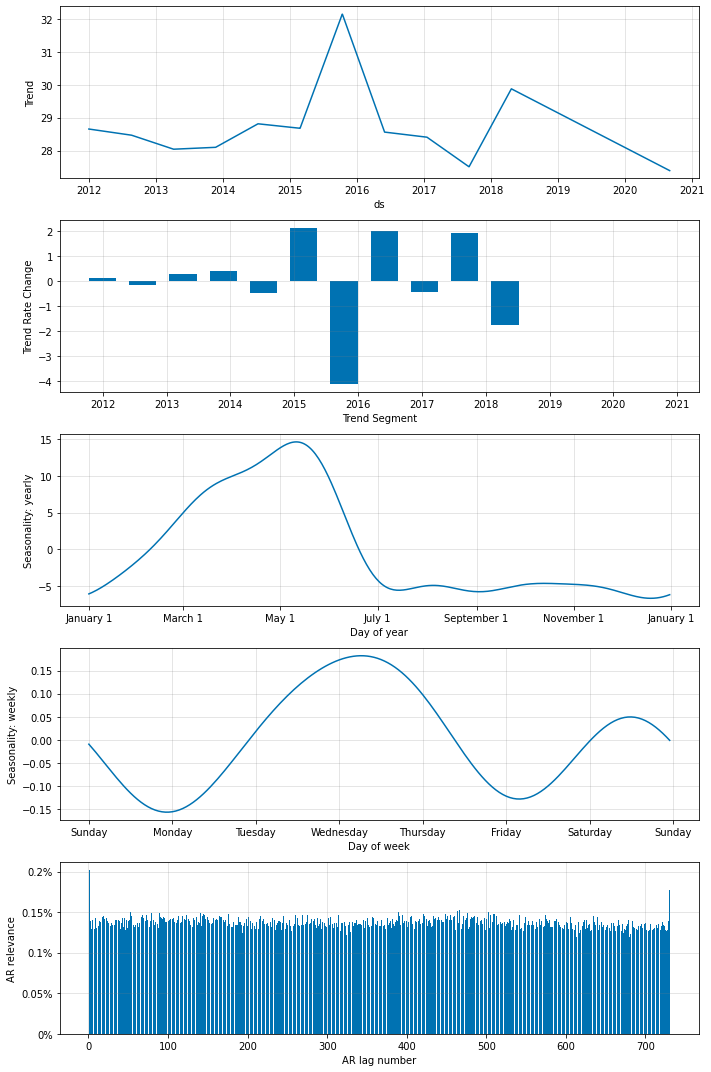

In [ ]:
fig_param = mnp3.plot_parameters()
